# Pandas: Iris Data ML Classification
## What are we doing
Train a ML to Classify the flowers based on their 10 nearest neigbour

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

## Getting Data From GitHub
Run Once Loads the repo

In [21]:
!git clone https://github.com/Damon-Martin/ClassifyingIrisDataSet

# Checking if the directory: listing files
!ls ClassifyingIrisDataSet

fatal: destination path 'ClassifyingIrisDataSet' already exists and is not an empty directory.
Iris.csv  README.md


## Loading Data from CSV from GitHub via Pandas: Data Set needs to be cloned
### About the Iris Data Set
Famous Data Set, We have 4 features of flowers such as len and width. 1 target which is the species.

In [22]:
data = pd.read_csv("ClassifyingIrisDataSet/Iris.csv")

# Extracting Inputs
inputs = data.values[:,:-1].astype(float)

# Supervised Learning: We know the flowers but we want to predict if a point flower belongs to the Targets I named.

# Exracting Targets
# Colouring when we plot the results
cls = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

targets = [cls.index(c) for c in data.values[:,-1].astype(str)]
targets = np.array(targets)

## Dimension Reduction: PCA

In [23]:
# Setting the PCA to fit the key "principle components" (main parts of the data) to fit in 2D
pca = PCA(n_components=2)
#Transforming our data using PCA to a compressed object. It's simply a compressed basic version of PCA.
compressed = pca.fit_transform(inputs)

## Training the ML Classifier: Using kNN to figure out which group does a flower belong too

In [26]:
# kNN: Looking at the nearest 10 items. Then, guess which flower it is.
classifier = KNeighborsClassifier(n_neighbors=10)
# kNN: Attatching inputs to targets to our classifier
classifier.fit(inputs, targets)

# Classified Data: The result. Essentially the data is now classified into different groups
classifiedData = classifier.predict(inputs)

## Plotting the Results: Using a Scatter Graph

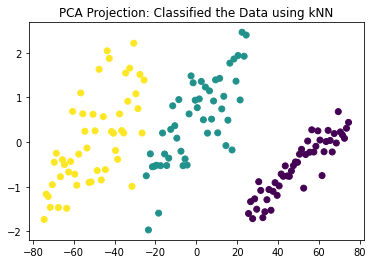

In [27]:
plt.figure()
# Plot Scatter: X = compressed X axis 0, Y axis & c is the classified data
plt.scatter(compressed[:,0], compressed[:,1], c = classifiedData)

# Labeling the Data
plt.title("PCA Projection: Classified the Data using kNN")

plt.savefig("irisProjection.png", bbox_inches="tight")
plt.show()